In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('top50.csv', encoding='ISO-8859-1')
df.head()

,Unnamed: 0,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,1,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,2,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,3,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,4,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,5,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [3]:
df = df.drop(columns = ['Unnamed: 0'])

In [4]:
df.head()

,Track.Name,Artist.Name,Genre,Beats.Per.Minute,Energy,Danceability,Loudness..dB..,Liveness,Valence.,Length.,Acousticness..,Speechiness.,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [5]:
df.shape

(50, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Track.Name        50 non-null     object
 1   Artist.Name       50 non-null     object
 2   Genre             50 non-null     object
 3   Beats.Per.Minute  50 non-null     int64 
 4   Energy            50 non-null     int64 
 5   Danceability      50 non-null     int64 
 6   Loudness..dB..    50 non-null     int64 
 7   Liveness          50 non-null     int64 
 8   Valence.          50 non-null     int64 
 9   Length.           50 non-null     int64 
 10  Acousticness..    50 non-null     int64 
 11  Speechiness.      50 non-null     int64 
 12  Popularity        50 non-null     int64 
dtypes: int64(10), object(3)
memory usage: 5.2+ KB


In [7]:
df.rename(columns={'Track.Name':'track_name','Artist.Name':'artist_name','Beats.Per.Minute':'beats_per_minute','Loudness..dB..':'Loudness(dB)','Valence.':'Valence','Length.':'Length', 'Acousticness..':'Acousticness','Speechiness.':'Speechiness'},inplace=True)
df.head()

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94


In [8]:
df.isnull().sum()

track_name          0
artist_name         0
Genre               0
beats_per_minute    0
Energy              0
Danceability        0
Loudness(dB)        0
Liveness            0
Valence             0
Length              0
Acousticness        0
Speechiness         0
Popularity          0
dtype: int64

In [9]:
df.fillna(0)

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [10]:
print(df.dtypes)

track_name          object
artist_name         object
Genre               object
beats_per_minute     int64
Energy               int64
Danceability         int64
Loudness(dB)         int64
Liveness             int64
Valence              int64
Length               int64
Acousticness         int64
Speechiness          int64
Popularity           int64
dtype: object


In [11]:
# Calculating the number of songs of each genre
print(type(df['Genre']))
popular_genre = df.groupby('Genre').size().unique
print(popular_genre)
genre_list = df['Genre'].values.tolist()

<class 'pandas.core.series.Series'>
<bound method Series.unique of Genre
atl hip hop         1
australian pop      1
big room            1
boy band            1
brostep             2
canadian hip hop    3
canadian pop        2
country rap         2
dance pop           8
dfw rap             2
edm                 3
electropop          2
escape room         1
latin               5
panamanian pop      2
pop                 7
pop house           1
r&b en espanol      1
reggaeton           2
reggaeton flow      2
trap music          1
dtype: int64>


In [12]:
# calculating the number of songs by each of the artists
print(df.groupby('artist_name').size())
popular_artist = df.groupby('artist_name').size()
print(popular_artist)
artist_list = df['artist_name'].values.tolist()

artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown         1
DJ Snake            1
Daddy Yankee        1
Drake               1
Ed Sheeran          4
J Balvin            2
Jhay Cortez         1
Jonas Brothers      1
Katy Perry          1
Khalid              1
Kygo                1
Lady Gaga           1
Lauv                1
Lewis Capaldi       1
Lil Nas X           2
Lil Tecca           1
Lizzo               1
Lunay               1
MEDUZA              1
Maluma              1
Marshmello          2
Martin Garrix       1
Nicky Jam           1
Post Malone         2
ROSALÍA             1
Sam Smith           1
Sech                2
Shawn Mendes        2
Taylor Swift        1
The Chainsmokers    2
Tones and I         1
Y2K                 1
Young Thug          1
dtype: int64
artist_name
Ali Gatie           1
Anuel AA            1
Ariana Grande       2
Bad Bunny           1
Billie Eilish       2
Chris Brown      

In [13]:
df.isnull().sum()
df.fillna(0)

,track_name,artist_name,Genre,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
0,Señorita,Shawn Mendes,canadian pop,117,55,76,-6,8,75,191,4,3,79
1,China,Anuel AA,reggaeton flow,105,81,79,-4,8,61,302,8,9,92
2,boyfriend (with Social House),Ariana Grande,dance pop,190,80,40,-4,16,70,186,12,46,85
3,Beautiful People (feat. Khalid),Ed Sheeran,pop,93,65,64,-8,8,55,198,12,19,86
4,Goodbyes (Feat. Young Thug),Post Malone,dfw rap,150,65,58,-4,11,18,175,45,7,94
5,I Don't Care (with Justin Bieber),Ed Sheeran,pop,102,68,80,-5,9,84,220,9,4,84
6,Ransom,Lil Tecca,trap music,180,64,75,-6,7,23,131,2,29,92
7,How Do You Sleep?,Sam Smith,pop,111,68,48,-5,8,35,202,15,9,90
8,Old Town Road - Remix,Lil Nas X,country rap,136,62,88,-6,11,64,157,5,10,87
9,bad guy,Billie Eilish,electropop,135,43,70,-11,10,56,194,33,38,95


In [14]:
pd.set_option('precision', 3)
df.describe()

,beats_per_minute,Energy,Danceability,Loudness(dB),Liveness,Valence,Length,Acousticness,Speechiness,Popularity
count,50.000,50.000,50.00,50.000,50.000,50.000,50.000,50.000,50.000,50.000
mean,120.060,64.060,71.38,-5.660,14.660,54.600,200.960,22.160,12.480,87.500
std,30.898,14.232,11.93,2.056,11.118,22.336,39.144,18.996,11.162,4.491
min,85.000,32.000,29.00,-11.000,5.000,10.000,115.000,1.000,3.000,70.000
25%,96.000,55.250,67.00,-6.750,8.000,38.250,176.750,8.250,5.000,86.000
50%,104.500,66.500,73.50,-6.000,11.000,55.500,198.000,15.000,7.000,88.000
75%,137.500,74.750,79.75,-4.000,15.750,69.500,217.500,33.750,15.000,90.750
max,190.000,88.000,90.00,-2.000,58.000,95.000,309.000,75.000,46.000,95.000


In [15]:
pd.set_option('display.width', 100)
pd.set_option('precision',3)
corr = df.corr(method='spearman')
print(corr)

                  beats_per_minute  Energy  Danceability  Loudness(dB)  Liveness  Valence  Length  \
beats_per_minute             1.000   0.012        -0.092         0.014    -0.033   -0.048  -0.198   
Energy                       0.012   1.000        -0.049         0.635     0.013    0.467   0.189   
Danceability                -0.092  -0.049         1.000         0.009    -0.261    0.155  -0.079   
Loudness(dB)                 0.014   0.635         0.009         1.000     0.114    0.317   0.165   
Liveness                    -0.033   0.013        -0.261         0.114     1.000   -0.187   0.202   
Valence                     -0.048   0.467         0.155         0.317    -0.187    1.000  -0.081   
Length                      -0.198   0.189        -0.079         0.165     0.202   -0.081   1.000   
Acousticness                -0.010  -0.211        -0.128        -0.040     0.204   -0.053  -0.005   
Speechiness                  0.392  -0.035         0.104        -0.063    -0.137   -0.095  

Text(0, 0.5, 'Count of the tracks')

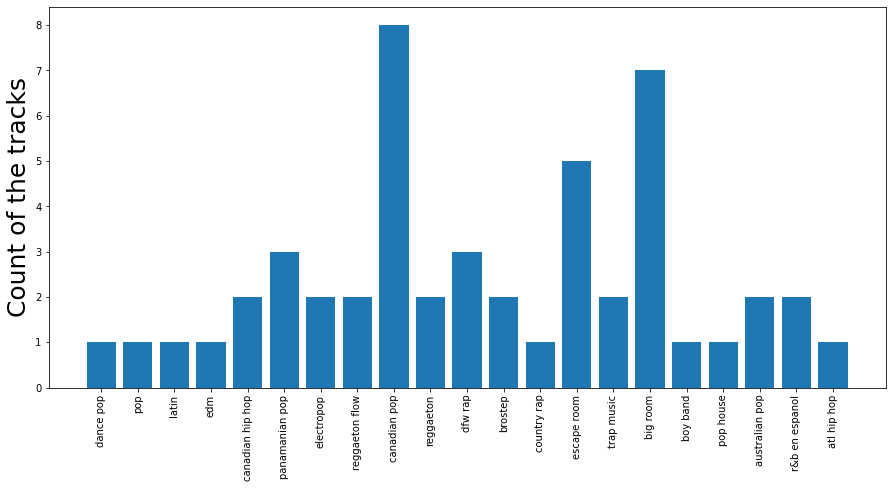

In [16]:
xtick = ['dance pop', 'pop', 'latin', 'edm', 'canadian hip hop',
'panamanian pop', 'electropop', 'reggaeton flow', 'canadian pop',
'reggaeton', 'dfw rap', 'brostep', 'country rap', 'escape room',
'trap music', 'big room', 'boy band', 'pop house', 'australian pop',
'r&b en espanol', 'atl hip hop']
length = np.arange(len(xtick))
genre_groupby = df.groupby('Genre')['track_name'].agg(len)
plt.figure(figsize=(15,7))
plt.bar(length, genre_groupby)
plt.xticks(length, xtick)
plt.xticks(rotation=90)
plt.ylabel('Genre', fontsize=20)
plt.ylabel('Count of the tracks', fontsize=25)

<AxesSubplot:title={'center':'Correlation heatmap'}>

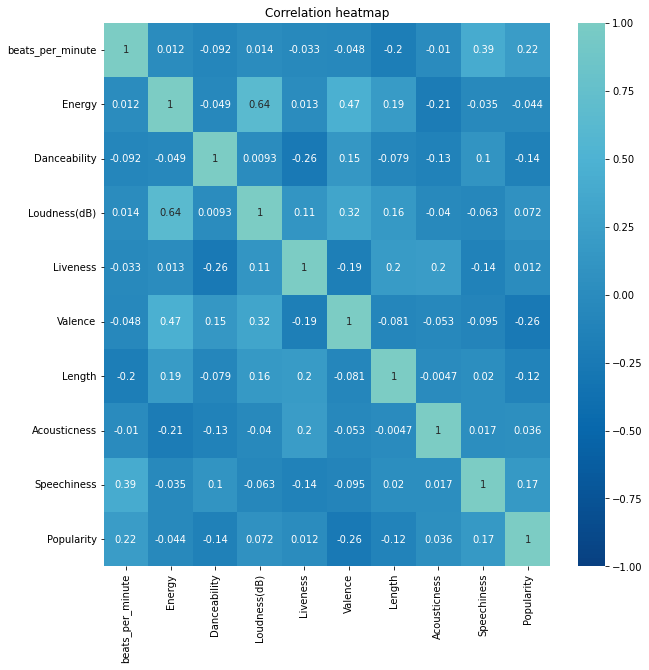

In [17]:
#heatmop of correlation
plt.figure(figsize=(10,10))
plt.title('Correlation heatmap')
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='GnBu_r', center=1)

Text(0.5, 1.0, 'Artist Name vs Count of songs')

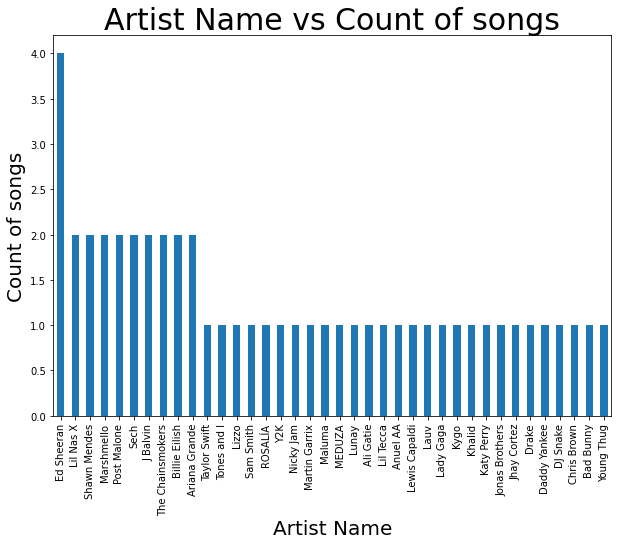

In [18]:
# No of songs sung by an artist
fig = plt.figure(figsize=(10,7))
df.groupby('artist_name')['track_name'].agg(len).sort_values(ascending=False).plot(kind='bar')
plt.xlabel('Artist Name', fontsize=20)
plt.ylabel('Count of songs',fontsize=20)
plt.title('Artist Name vs Count of songs', fontsize=30)

<AxesSubplot:xlabel='Energy', ylabel='Loudness(dB)'>

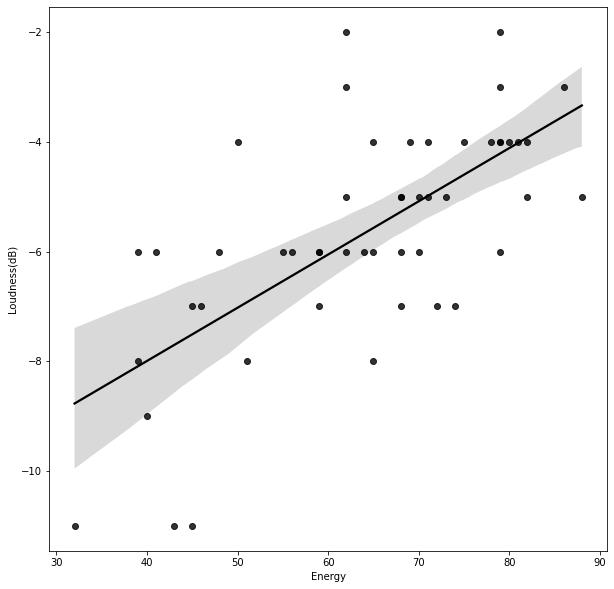

In [19]:
#Analusing the relationship between energy and loudness
fig = plt.subplots(figsize=(10,10))
sns.regplot(x='Energy', y='Loudness(dB)', data=df, color='black')

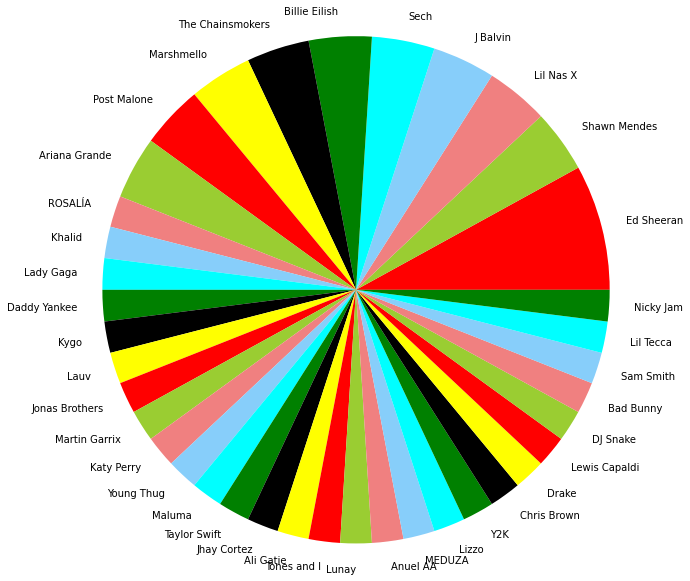

In [20]:
#Pie Chart
labels = df.artist_name.value_counts().index
sizes =  df.artist_name.value_counts().values
colors = ['red', 'yellowgreen', 'lightcoral', 'lightskyblue','cyan', 'green', 'black','yellow']
plt.figure(figsize=(10,10))
plt.pie(sizes, labels=labels, colors=colors)
autopct = ('%1.1f%')
plt.axis('equal')
plt.show()

# Train Test Split

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score,KFold
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

In [22]:
#Linear regression, first create test and train dataset
X=df.loc[:,['Energy','Danceability','Length','Loudness(dB)','Acousticness']].values
y=df.loc[:,'Popularity'].values

In [23]:
print(X)

[[ 55  76 191  -6   4]
 [ 81  79 302  -4   8]
 [ 80  40 186  -4  12]
 [ 65  64 198  -8  12]
 [ 65  58 175  -4  45]
 [ 68  80 220  -5   9]
 [ 64  75 131  -6   2]
 [ 68  48 202  -5  15]
 [ 62  88 157  -6   5]
 [ 43  70 194 -11  33]
 [ 62  61 251  -5  60]
 [ 71  82 185  -4  28]
 [ 41  50 182  -6  75]
 [ 79  73 288  -2   7]
 [ 50  83 205  -4  10]
 [ 45  70 261  -7  12]
 [ 65  75 243  -6  15]
 [ 48  76 158  -6  56]
 [ 39  84 161  -8  18]
 [ 62  72 173  -3  11]
 [ 74  68 153  -7   4]
 [ 59  70 115  -6  34]
 [ 79  81 309  -4  14]
 [ 78  80 266  -4  36]
 [ 45  67 195 -11  25]
 [ 82  69 191  -4  49]
 [ 59  82 210  -6  69]
 [ 46  73 213  -7  37]
 [ 86  74 193  -3  11]
 [ 79  64 222  -4   3]
 [ 51  29 210  -8  12]
 [ 32  78 179 -11  59]
 [ 71  78 176  -5  22]
 [ 59  80 200  -7   2]
 [ 88  77 224  -5  19]
 [ 72  66 164  -7  18]
 [ 70  75 226  -5  14]
 [ 82  72 162  -5  13]
 [ 73  84 181  -5   4]
 [ 56  81 199  -6  48]
 [ 68  69 228  -7   2]
 [ 68  77 171  -6   1]
 [ 39  57 216  -6  37]
 [ 40  90 1

In [24]:
print(y)

[79 92 85 86 94 84 92 90 87 95 93 86 88 87 92 82 90 91 88 91 91 91 83 91
 89 70 83 89 91 89 84 89 89 89 89 89 91 87 80 78 88 90 87 84 88 88 88 88
 88 82]


In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)

In [26]:
print(X.shape, X_train.shape, X_test.shape)

(50, 5) (35, 5) (15, 5)


In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

91.26285443478865
[ 0.02685226 -0.02498236 -0.01619917  0.06068331  0.00843284]


In [28]:
#Actual vs Predicted
y_pred = regressor.predict(X_test)
df_op = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(df_op)

    Actual  Predicted
0       89     87.111
1       89     88.252
2       91     88.508
3       87     88.848
4       80     87.923
5       89     87.930
6       84     87.299
7       88     87.270
8       91     88.202
9       89     87.182
10      88     88.435
11      87     87.864
12      91     87.111
13      70     88.817
14      92     88.638


In [29]:
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error

In [30]:
MSE = mean_squared_error(y_test, y_pred)
print('Mean Squared Error:', MSE.round(2))

Mean Squared Error: 32.11


Text(0, 0.5, 'Test Values')

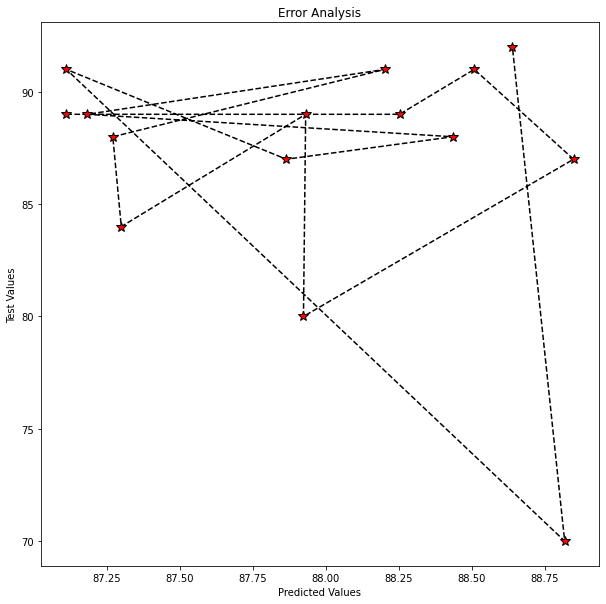

In [31]:
plt.figure(figsize=(10,10))
plt.plot(y_pred, y_test, color='black', linestyle='dashed', marker='*', markerfacecolor='red', markersize=10)
plt.title('Error Analysis')
plt.xlabel('Predicted Values')
plt.ylabel('Test Values')

In [32]:
# Cross validation score
X=df.loc[:,['Energy','Danceability']].values
y=df.loc[:,'Popularity'].values
regressor=LinearRegression()
mse=cross_val_score(regressor,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mse_mean=np.mean(mse)
print(mse_mean)
diff=MSE-abs(mse_mean)
print(diff)

-22.03315739920442
10.078709708281316


In [33]:
# Lets check Popularity

In [34]:
X = df.loc[:, ['Energy', 'Length', 'Danceability', 'beats_per_minute', 'Acousticness']].values
y = df.loc[:, 'Popularity'].values

In [35]:
X

array([[ 55, 191,  76, 117,   4],
       [ 81, 302,  79, 105,   8],
       [ 80, 186,  40, 190,  12],
       [ 65, 198,  64,  93,  12],
       [ 65, 175,  58, 150,  45],
       [ 68, 220,  80, 102,   9],
       [ 64, 131,  75, 180,   2],
       [ 68, 202,  48, 111,  15],
       [ 62, 157,  88, 136,   5],
       [ 43, 194,  70, 135,  33],
       [ 62, 251,  61, 176,  60],
       [ 71, 185,  82,  96,  28],
       [ 41, 182,  50, 110,  75],
       [ 79, 288,  73, 176,   7],
       [ 50, 205,  83, 101,  10],
       [ 45, 261,  70,  93,  12],
       [ 65, 243,  75, 176,  15],
       [ 48, 158,  76,  90,  56],
       [ 39, 161,  84, 130,  18],
       [ 62, 173,  72, 158,  11],
       [ 74, 153,  68, 124,   4],
       [ 59, 115,  70, 154,  34],
       [ 79, 309,  81,  92,  14],
       [ 78, 266,  80,  92,  36],
       [ 45, 195,  67, 135,  25],
       [ 82, 191,  69, 124,  49],
       [ 59, 210,  82,  98,  69],
       [ 46, 213,  73,  96,  37],
       [ 86, 193,  74,  94,  11],
       [ 79, 2

In [36]:
y

array([79, 92, 85, 86, 94, 84, 92, 90, 87, 95, 93, 86, 88, 87, 92, 82, 90,
       91, 88, 91, 91, 91, 83, 91, 89, 70, 83, 89, 91, 89, 84, 89, 89, 89,
       89, 89, 91, 87, 80, 78, 88, 90, 87, 84, 88, 88, 88, 88, 88, 82],
      dtype=int64)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
print(X.shape, X_train.shape, X_test.shape)

(50, 5) (35, 5) (15, 5)


In [38]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
df_op = pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
print(df_op)

    Actual  Predicted
0       89         91
1       89         88
2       88         90
3       80         92
4       85         87
5       86         90
6       88         90
7       89         89
8       88         87
9       89         88
10      89         91
11      78         83
12      91         87
13      91         90
14      91         87


In [39]:
scores = cross_val_score(gnb,X_train, y_train, scoring='accuracy', cv=3).mean()*100
print(scores)

11.363636363636365


In [41]:
from sklearn.svm import LinearSVC
LinSVC = LinearSVC(penalty='l2', loss='squared_hinge', dual=True)
LinSVC.fit(X_train, y_train)
y_pred=gnb.predict(X_test)
df_output = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(df_output)

    Actual  Predicted
0       89         91
1       89         88
2       88         90
3       80         92
4       85         87
5       86         90
6       88         90
7       89         89
8       88         87
9       89         88
10      89         91
11      78         83
12      91         87
13      91         90
14      91         87


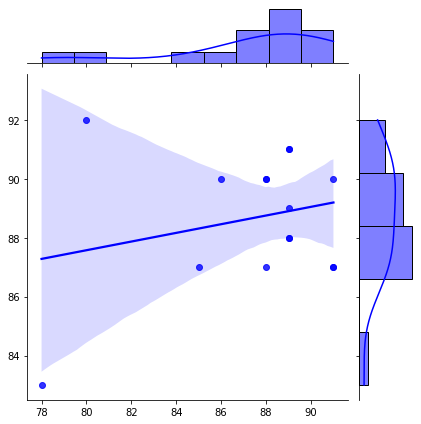

In [42]:
sns.jointplot(x=y_test, y=y_pred, kind='reg', color='b')